Optimal values:
x = 2.0
y = 2.0
Optimal objective function value (z) = 18.0


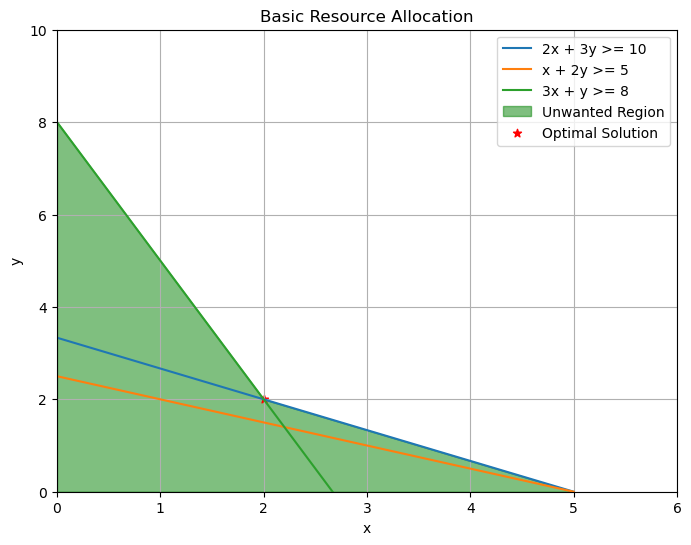

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the objective function coefficients
c = [4, 5]

# Coefficients of the inequality constraints
A = np.array([
    [-2, -3],  # CPU constraint
    [-1, -2],  # Memory constraint
    [-3, -1],  # Storage constraint
])

# Right-hand side values of the inequality constraints
b = [-10, -5, -8]

# Solve linear programming problem
result = linprog(c, A_ub=A, b_ub=b)

# Display the results
print("Optimal values:")
print("x =", result.x[0])
print("y =", result.x[1])
print("Optimal objective function value (z) =", result.fun)

# Plotting the feasible region
x_values = np.linspace(0, 5, 100)
y1_values = (10 - 2*x_values) / 3
y2_values = (5 - x_values) / 2
y3_values = 8 - 3*x_values

plt.figure(figsize=(8, 6))
plt.plot(x_values, y1_values, label='2x + 3y >= 10')
plt.plot(x_values, y2_values, label='x + 2y >= 5')
plt.plot(x_values, y3_values, label='3x + y >= 8')

plt.fill_between(x_values, np.maximum(np.maximum(y1_values, y2_values), y3_values), color='green', alpha=0.5, label='Unwanted Region')
plt.scatter(result.x[0], result.x[1], color='red', marker='*', label='Optimal Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10)
plt.xlim(0,6)
plt.title('Basic Resource Allocation')
plt.legend()
plt.grid(True)
plt.show()
